# Plot temporal data for pairs of nodes on the KEGG pathway - October 20, 2016


In [1]:
%matplotlib inline

import os, ast
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

matplotlib.style.use('ggplot')

ts_file = os.path.join('..', 'cytoscape', 'yeast_kegg_101316', 'cytoscape_time_series.txt')
id_file = os.path.join('..', 'data', 'sgd', 'SGD_id_map.txt')

out_dir = os.path.join('..', 'cytoscape', 'yeast_kegg_101316')

## Load the yeast is map and significant peptide profiles
These are all peptides for each protein that are significant at one or more time points.  Missing data have already been imputed.

In [2]:
# Map systematic id to standard name
id_map = dict()
with open(id_file) as id_f:
    for line in id_f:
        parts = line.strip().split('\t')
        id_map[parts[0]] = parts[1]

print 'Loaded {} ids'.format(len(id_map))

ts_df = pd.read_csv(ts_file, sep = '\t') 
print 'Loaded time series data for {} proteins'.format(len(ts_df))
ts_df.head()

Loaded 8061 ids
Loaded time series data for 784 proteins


,ORF,Peptide1,Peptide2,Peptide3,Peptide4,Peptide5,Peptide6,Peptide7,Peptide8,Peptide9,Peptide10,Peptide11
0,YAL001C,"0, 0.148088082645, 0.0120680233091, 0.06225989...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,YAL022C,"0, -0.115675601627, -0.18777288305, -0.2007966...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,YAL024C,"0, 0.451118776395, 0.451118776395, 0.505890929...","0, -0.0729531096078, -0.570764341504, -0.18056...","0, 0.0781999199214, 0.375845724668, 0.09004041...","0, 0.10540989404, -0.283948534549, -0.40518395...","0, 0.215864939153, 0.268913415758, 0.363451457...",NaN,NaN,NaN,NaN,NaN,NaN
3,YAL026C,"0, -1.37048950066, -0.220546952532, -0.3143020...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,YAL031C,"0, 0.0574156124272, 0.271784213569, 0.26195197...","0, -0.0244872002422, -0.00443588635042, -0.075...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Helper functions to plot the time series data
Optionally save the figure as a png image

In [3]:
times = np.array(map(lambda x: x * 5, range(0,13)))

# Convert to a list, then a numpy array, then drop the intial added 0
def to_array(ts):
    ts = '[' + ts + ']'
    ts = ast.literal_eval(ts)
    ts = ts[1:]
    ts = np.array(ts)
    return ts

# interaction is a tuple (upstream protein, interaction type, downstream protein)
# Use the systematic names and map the ids with the global id map
def plot_time_series(interaction, out_dir = None):
    plt.figure()
    upstream_prot = interaction[0]
    relationship = interaction[1]
    downstream_prot = interaction[2]
    
    upstream_name = '{} ({})'.format(id_map[upstream_prot], upstream_prot)
    downstream_name = '{} ({})'.format(id_map[downstream_prot], downstream_prot)
    
    title = '{} {} {}'.format(upstream_name, relationship, downstream_name)
    
    # Plot the peptides on the upstream protein
    for (peptide, value) in ts_df.ix[ts_df['ORF'] == upstream_prot, 'Peptide1':'Peptide11'].iteritems():
        ts = str(value.values[0])
        if ts != 'nan':
            ts = to_array(ts)
            plt.plot(times, ts, 'k')

    # Plot the peptides on the downstream protein
    for (peptide, value) in ts_df.ix[ts_df['ORF'] == downstream_prot, 'Peptide1':'Peptide11'].iteritems():
        ts = str(value.values[0])
        if ts != 'nan':
            ts = to_array(ts)
            plt.plot(times, ts, 'r')
    

    # Having trouble getting the legend to show up with the actual lines
    line1 = mlines.Line2D([], [], color='black', label=upstream_name)
    line2 = mlines.Line2D([], [], color='red', label=downstream_name)
    legend = plt.legend(handles=[line1, line2], bbox_to_anchor=(1.02, 1), borderaxespad=0, loc='upper left')
    legend.get_frame().set_facecolor('None')
    
    plt.xlabel('Time (seconds)')
    plt.ylabel('Phosphorylation log2(treatment/control)')
    plt.title(title, y=1.1)
    plt.tight_layout()
    
    if not out_dir is None:
        filename = title.replace('(', '').replace(')', '').replace(' ', '_') + '.png'
        print 'Saving ' + filename
        out_file = os.path.join(out_dir, filename)

        # Include the legend in the saved image http://stackoverflow.com/questions/10101700/moving-matplotlib-legend-outside-of-the-axis-makes-it-cutoff-by-the-figure-box
        plt.savefig(out_file, dpi=600, bbox_extra_artists=(legend,), bbox_inches='tight')

## Plot the time series data for pairs of nodes on the KEGG pathway
Include nodes that do not directly interact.  Manually select the node pairs from the Cytoscape figure.

Saving CDC24_YAL041W_indirectly_activates_STE20_YHL007C.png
Saving STE20_YHL007C_indirectly_activates_PBS2_YJL128C.png
Saving SLN1_YIL147C_indirectly_inhibits_SSK1_YLR006C.png
Saving SSK1_YLR006C_activates_SSK2_YNR031C.png
Saving SSK2_YNR031C_activates_PBS2_YJL128C.png
Saving PBS2_YJL128C_activates_HOG1_YLR113W.png
Saving PTP3_YER075C_inhibits_HOG1_YLR113W.png
Saving HOG1_YLR113W_activates_MSN2_YMR037C.png
Saving HOG1_YLR113W_activates_MSN4_YKL062W.png
Saving HOG1_YLR113W_inhibits_SKO1_YNL167C.png


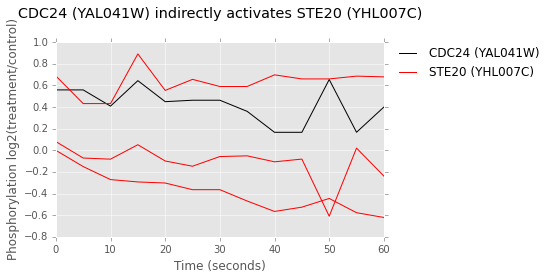

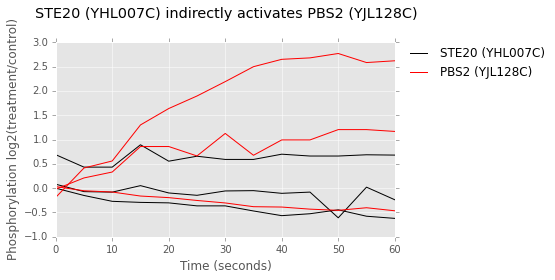

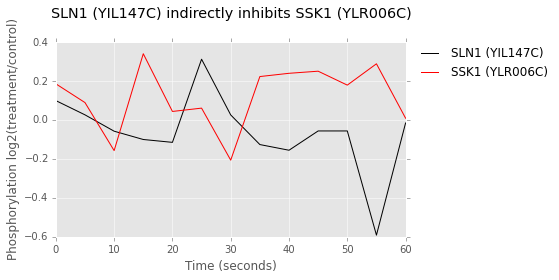

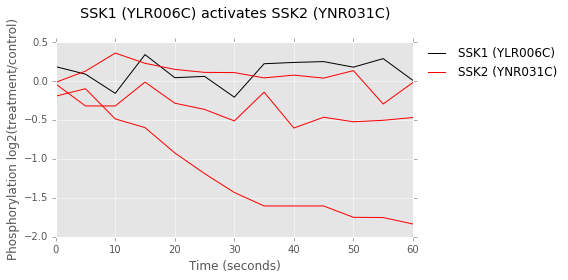

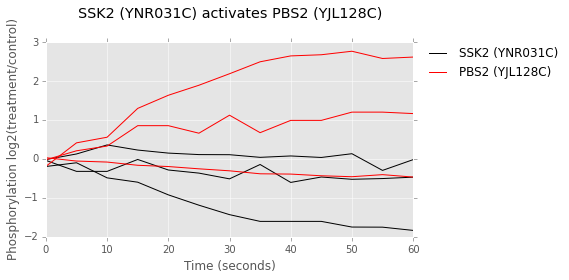

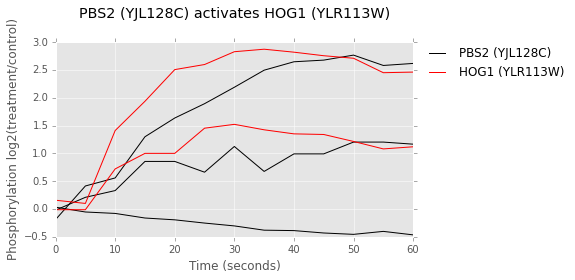

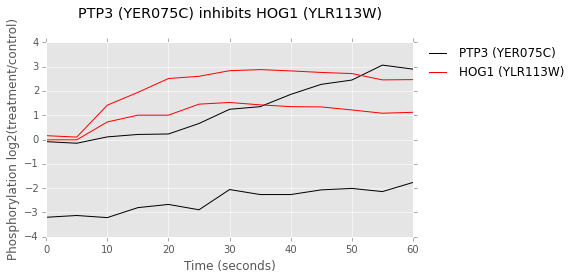

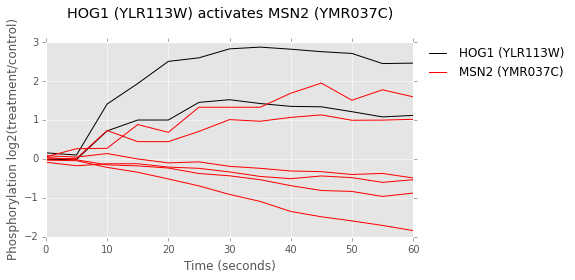

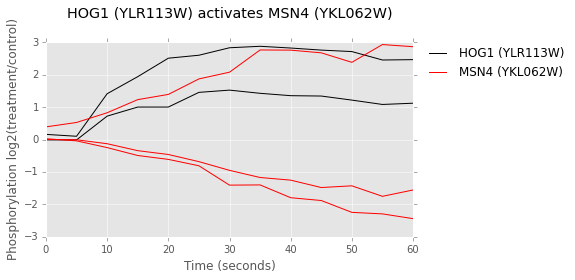

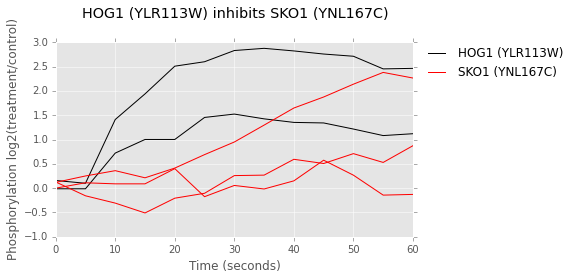

In [4]:
interactions =\
    [('YAL041W', 'indirectly activates', 'YHL007C'),
    ('YHL007C', 'indirectly activates', 'YJL128C'),
    ('YIL147C', 'indirectly inhibits', 'YLR006C'),
    ('YLR006C', 'activates', 'YNR031C'),
    ('YNR031C', 'activates', 'YJL128C'),
    ('YJL128C', 'activates', 'YLR113W'),
    ('YER075C', 'inhibits', 'YLR113W'),
    ('YLR113W', 'activates', 'YMR037C'),
    ('YLR113W', 'activates', 'YKL062W'),
    ('YLR113W', 'inhibits', 'YNL167C')]

for interaction in interactions:
    plot_time_series(interaction, out_dir)